Imports

In [9]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

HTTP Request

In [10]:
# Store website in variable

website = "https://eg.hatla2ee.com/en/car"

In [11]:
# Get request

response = requests.get(website)

In [12]:
# Status code

response.status_code

200

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html dir="ltr" lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="Car Market: Buy used car in Egypt" name="title"/>
<meta content="https://media.hatla2eestatic.com/uploads/og/used_car/up_f158f2b7ea15fc40c4121c4c66b5ef3a.png" name="og:image"/>
<link href="https://eg.hatla2ee.com/en/car" rel="canonical"/>
<title>Car Market: Buy used car in Egypt : Hatla2ee</title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="231331426909240" property="fb:admins"/>
<meta content="341722347713-9viecv37llnp18rcibsa0r7fc70ufbo1.apps.googleusercontent.com" name="google-signin-client_id"/>
<!--    <meta name="google-signin-client_id" content="--><!--.apps.googleusercontent.com">-->
<style>
        @font-face {
            font-family: 'Material Ic
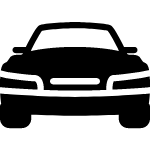
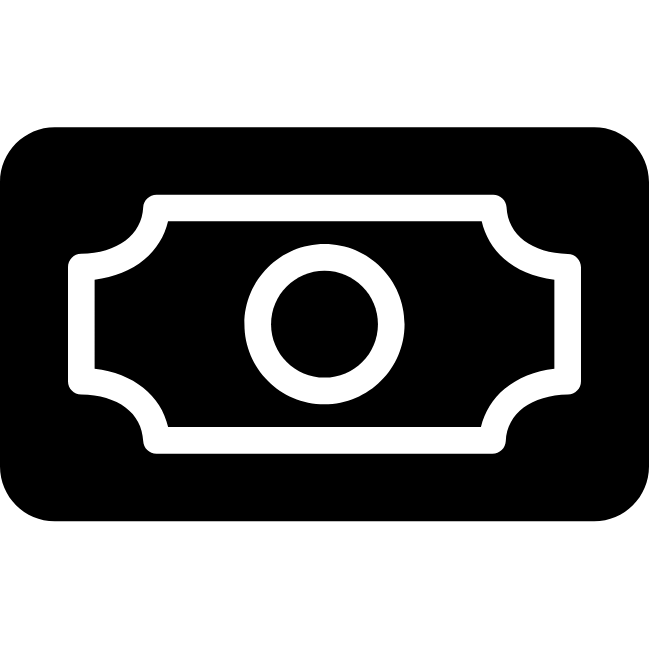
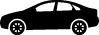
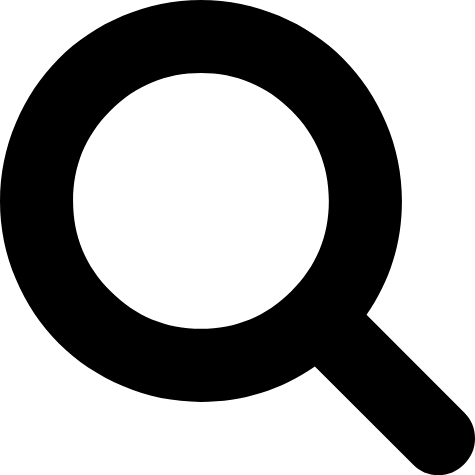

In [13]:
# Soup Object   

soup = BeautifulSoup(response.content, 'html.parser')
soup

In [14]:
# Results

results = soup.find_all('div', {'class':'vehicle-card'})
results

[]

In [15]:
len(results)

0

In [16]:
results[0]	

IndexError: list index out of range

Getting the necessary data

In [ ]:
# Name

results[0].find('h2', {'class':'title'}).text

'2022 Mercedes-Benz EQS 580 Base 4MATIC'

In [ ]:
# Mileage

results[0].find('div', {'class':'mileage'}).text.strip().replace('mi.', '').replace(' ','')

'4,506'

In [ ]:
# Rating 

results[0].find('span', {'class':'sds-rating__count'}).text	

'4.8'

In [ ]:
# Rating count

results[0].find('span', {'class':'sds-rating__link sds-button-link'}).text.strip().replace('(','').replace(')','').replace('reviews','').replace(' ','')

'1,265'

In [ ]:
# Price

results[0].find('span', {'class':'primary-price'}).text

'$107,991'

In [ ]:
# Dealer name

results[0].find('div', {'class':'dealer-name'}).text.strip().replace('\n', ', ')

'Mercedes-Benz of Chicago'

Putting everything in a for loop

In [ ]:
name = []
mileage = []
rating = []
rating_count = []
price = []
dealer_name = []

for result in results:
    
    # Name 
    try:
        name.append(result.find('h2', {'class':'title'}).text)
    except:
        name.append('N/A')
        
    # Mileage
    try:
        mileage.append(result.find('div', {'class':'mileage'}).text.strip().replace('mi.', '').replace(' ',''))
    except:
        mileage.append('N/A')
    
    # Rating
    try:
        rating.append(result.find('span', {'class':'sds-rating__count'}).text)
    except:
        rating.append('N/A')
    
    # Rating count
    try:
        rating_count.append(result.find('span', {'class':'sds-rating__link sds-button-link'}).text.strip().replace('(','').replace(')','').replace('reviews','').replace(' ',''))
    except:
        rating_count.append('N/A')
    
    # Price
    try:
        price.append(result.find('span', {'class':'primary-price'}).text)
    except:
        price.append('N/A')
    
    # Dealer name
    try:
        dealer_name.append(result.find('div', {'class':'dealer-name'}).text.strip().replace('\n', ', '))
    except:
        dealer_name.append('N/A')
    

Scrapping from many pages

In [ ]:
name = []
mileage = []
rating = []
rating_count = []
price = []
dealer_name = []

for i in range(1,171):
    
    # Website
    website = "https://www.cars.com/shopping/results/?stock_type=cpo&makes%5B%5D=mercedes_benz&models%5B%5D=&list_price_max=&maximum_distance=20&zip="
    
    # Get request
    response = requests.get(website)
    
    # Soup object
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Results
    results =  soup.find_all('div', {'class':'vehicle-card'})
    

    for result in results:
        
        # Name 
        try:
            name.append(result.find('h2', {'class':'title'}).text)
        except:
            name.append('N/A')
            
        # Mileage
        try:
            mileage.append(result.find('div', {'class':'mileage'}).text.strip().replace('mi.', '').replace(' ',''))
        except:
            mileage.append('N/A')
        
        # Rating
        try:
            rating.append(result.find('span', {'class':'sds-rating__count'}).text)
        except:
            rating.append('N/A')
        
        # Rating count
        try:
            rating_count.append(result.find('span', {'class':'sds-rating__link sds-button-link'}).text.strip().replace('(','').replace(')','').replace('reviews','').replace(' ',''))
        except:
            rating_count.append('N/A')
        
        # Price
        try:
            price.append(result.find('span', {'class':'primary-price'}).text)
        except:
            price.append('N/A')
        
        # Dealer name
        try:
            dealer_name.append(result.find('div', {'class':'dealer-name'}).text.strip().replace('\n', ', '))
        except:
            dealer_name.append('N/A')

Pandas Dataframe

In [ ]:
car_dealer = pd.DataFrame({'Name': name, 'Dealer Name': dealer_name, 'Price': price, 'Mileage': mileage, 'Rating': rating, 'Rating Count': rating_count,})
car_dealer

,Name,Dealer Name,Price,Mileage,Rating,Rating Count
0,2016 Mercedes-Benz GLC-Class GLC 300,Mercedes-Benz of Laguna Niguel,"$25,604","47,691",4.8,"1,708"
1,2022 Mercedes-Benz GLS 450 4MATIC,Mercedes-Benz Of Tacoma,"$89,989","4,256",4.4,"3,075"
2,2020 Mercedes-Benz AMG SLC 43 Base,Mercedes-Benz of Portland,"$64,017","9,263",4.6,"1,478"
3,2021 Mercedes-Benz GLB 250 Base 4MATIC,Mercedes-Benz of Portland,"$38,989","4,481",4.6,"1,478"
4,2020 Mercedes-Benz GLA 250 Base,Mercedes-Benz of South Bay,"$31,896","28,475",4.6,"1,421"
...,...,...,...,...,...,...
3565,2022 Mercedes-Benz GLB 250 Base,Mercedes-Benz of South Orlando,"$43,007","1,915",4.7,"1,294"
3566,2020 Mercedes-Benz AMG GT 63 S 4-Door,Mercedes-Benz of Orlando,"$165,990","5,625",4.7,770
3567,2019 Mercedes-Benz GLC 300 Base,Mercedes-Benz of Miami,"$26,995","55,795",4.5,"1,133"
3568,2018 Mercedes-Benz AMG GLC 43 Base 4MATIC,Mercedes-Benz of Orlando,"$39,990","45,076",4.7,770
